In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 60% 9.00M/15.1M [00:00<00:00, 47.1MB/s]
100% 15.1M/15.1M [00:00<00:00, 63.4MB/s]


In [ ]:
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tum

In [ ]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
path ='/content/brain_tumor_dataset/no'
size =[]

for img_file in os.listdir(path):
    img_path = os.path.join(path, img_file)

    if img_file.endswith(".jpg") or img_file.endswith(".JPG") or img_file.endswith(".jpeg"):
        # Open the image file using Pillow
        with Image.open(img_path) as img:
            # Get the size
            width, height = img.size
            size.append(img.size)
            print(f"Image: {img_file}, Size: {width}x{height}")

Image: 36 no.jpg, Size: 228x221
Image: No17.jpg, Size: 393x400
Image: No16.jpg, Size: 300x200
Image: N6.jpg, Size: 196x257
Image: 25 no.jpg, Size: 232x217
Image: 5 no.jpg, Size: 225x225
Image: 24 no.jpg, Size: 235x214
Image: 44no.jpg, Size: 441x442
Image: N19.JPG, Size: 230x282
Image: no 7.jpeg, Size: 630x630
Image: 14 no.jpg, Size: 177x197
Image: 19 no.jpg, Size: 200x200
Image: no 2.jpg, Size: 232x217
Image: N5.jpg, Size: 201x250
Image: no 94.jpg, Size: 630x630
Image: N15.jpg, Size: 225x225
Image: 23 no.jpg, Size: 208x242
Image: 7 no.jpg, Size: 428x417
Image: No11.jpg, Size: 630x630
Image: 31 no.jpg, Size: 200x252
Image: 27 no.jpg, Size: 218x231
Image: no 100.jpg, Size: 225x225
Image: N11.jpg, Size: 630x614
Image: 26 no.jpg, Size: 200x252
Image: 35 no.jpg, Size: 225x225
Image: No18.jpg, Size: 442x454
Image: 11 no.jpg, Size: 300x168
Image: no 4.jpg, Size: 220x275
Image: N2.JPG, Size: 208x248
Image: 6 no.jpg, Size: 192x192
Image: 48 no.jpeg, Size: 630x630
Image: No21.jpg, Size: 442x442


In [ ]:
pd.Series(size).value_counts()

,count
"(225, 225)",16
"(630, 630)",6
"(442, 442)",4
"(300, 168)",3
"(232, 217)",3
"(201, 251)",3
"(228, 221)",2
"(201, 250)",2
"(220, 275)",2
"(218, 231)",2


In [ ]:
import cv2
path_no = '/content/no'
path_yes ='/content/yes'
X = []
y = []
for im in os.listdir(path_no):
  img_path = os.path.join(path_no, im)
  img = cv2.imread(img_path)
  img = cv2.resize(img , (225,225))
  X.append(img)
  y.append(0)

for im in os.listdir(path_yes):
  img_path = os.path.join(path_yes, im)
  img = cv2.imread(img_path)
  img = cv2.resize(img , (225,225))
  X.append(img)
  y.append(1)
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
data = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/brain_tumor_dataset',
   shuffle=True ,
  image_size=(400,400),
  batch_size=32
  )

Found 253 files belonging to 2 classes.


In [ ]:
class_names = data.class_names
class_names

['no', 'yes']

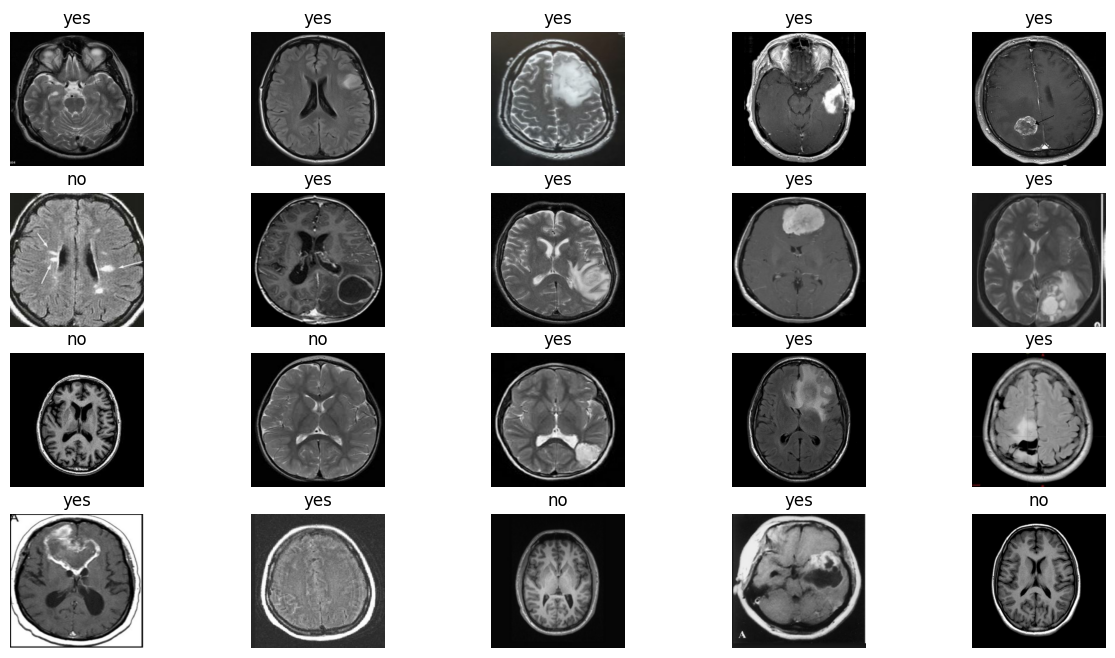

In [ ]:
plt.figure(figsize=(15,8))
for x , y in data.take(1):
  for i in range(20):
    plt.subplot(4,5,i+1)
    plt.title(class_names[y[i]])
    plt.imshow(x[i].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
# Split dataset into train and validation sets
train_size = int(0.7 * len(data))  # 70% for training
val_size = int(0.15 * len(data))    # 15% for validation
test_size = len(data) - train_size - val_size

train_dataset = data.take(train_size)
val_dataset = data.skip(train_size).take(val_size)
test_dataset = data.skip(train_size + val_size).take(test_size)

In [ ]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, 400, 400, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(400, 400,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])

history = model.fit(
    train_dataset,
    epochs=10  ,
    validation_data = val_dataset
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 65s 12s/step - accuracy: 0.5938 - loss: 1198.1808 - val_accuracy: 0.8125 - val_loss: 78.2338
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 54s 11s/step - accuracy: 0.7219 - loss: 146.2951 - val_accuracy: 0.8125 - val_loss: 67.6722
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 53s 11s/step - accuracy: 0.7976 - loss: 30.0754 - val_accuracy: 0.8438 - val_loss: 3.4629
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 10s/step - accuracy: 0.8453 - loss: 4.3024 - val_accuracy: 0.8750 - val_loss: 2.7855
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step - accuracy: 0.8611 - loss: 2.2630 - val_accuracy: 0.9688 - val_loss: 0.4327
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 84s 10s/step - accuracy: 0.9315 - loss: 0.4160 - val_accuracy: 0.9062 - val_loss: 0.1051
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 10s/step - accuracy: 0.9799 - loss: 0.0753 - val_accuracy: 0.9688 - val_loss: 0.4382
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 52s 10s/step - accuracy: 0.9958 - loss: 0.0472 - val_accuracy: 1.0000 - val_loss:

In [ ]:
loss, accuracy = model.evaluate(test_dataset, verbose=1)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 1.0000 - loss: 4.7130e-04
Test Loss: 0.0006179788033477962
Test Accuracy: 1.0


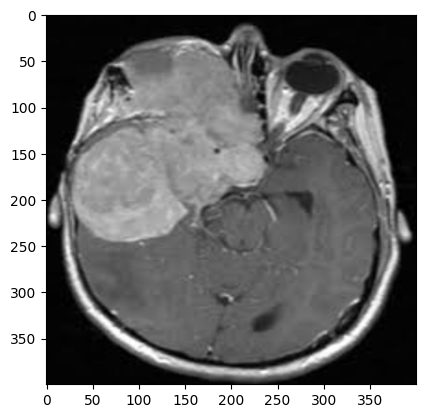

In [ ]:
tImg = cv2.imread('/content/yes/Y106.jpg')
tImg = cv2.resize(tImg ,(400,400))
plt.imshow(tImg)

In [ ]:
print(tImg.shape)

(400, 400, 3)


In [ ]:
tImg = cv2.resize(tImg, (400, 400))  # Resize to (400, 400)

# If it's a grayscale image, convert it to RGB
if len(tImg.shape) == 2:  # Grayscale has only 2 dimensions
    tImg = cv2.cvtColor(tImg, cv2.COLOR_GRAY2RGB)  # Convert to RGB (400, 400, 3)

# Ensure the shape is (400, 400, 3)
tImg = np.array(tImg).astype('float32')

# Add batch dimension to make it (1, 400, 400, 3)
tImg = np.expand_dims(tImg, axis=0)

# Make prediction
prediction = model.predict(tImg)

# If you're predicting a class, apply argmax
predicted_class = (prediction > 0.6).astype(int)

print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
Predicted class: [[1]]
